## Bagging

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

### Question 1: Mettez en œuvre le Bagging avec des arbres de profondeur 1 en utilisant BaggingRegressor.

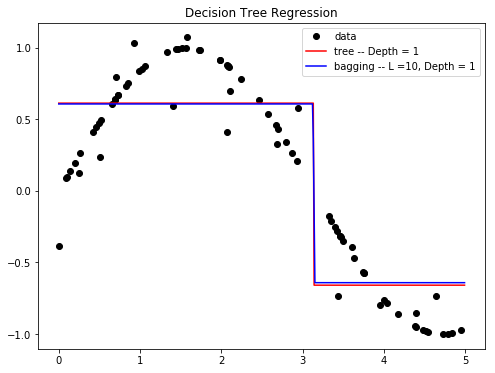

In [2]:
# Create a random dataset

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

n_estimators = 10  # L in the text
tree_max_depth = 1
bagging_max_depth = 1

# TODO define the regressor by bagging stumps

tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(
    max_depth=bagging_max_depth), n_estimators=n_estimators)
bagging.fit(X, y)

# Predict

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', c="k", label="data")

# TODO add plots for Bagging/Tree

plt.plot(X_test, y_tree, c="r", label="tree -- Depth = " + str(tree_max_depth))
plt.plot(X_test, y_bagging, c="b", label="bagging -- L =" +
         str(n_estimators) + ", Depth = " + str(tree_max_depth))
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

### Question 2: Illustrer graphiquement le rôle de L ainsi que de la profondeur des arbres (max_depth).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# This function returns the regression train score and test score by decision tree regressor and bagging regression repectively.
def regress_bagging_score(n_estimators, tree_max_depth, bagging_max_depth, *args, **kwargs):

    # TODO define the regressor by bagging stumps
    max_samples = kwargs.get('max_samples', 1.0)
    bootstrap = kwargs.get('bootstrap', True)
    tree = DecisionTreeRegressor(max_depth=tree_max_depth)
    tree.fit(X_train, y_train)
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(
        max_depth=bagging_max_depth), n_estimators=n_estimators, max_samples=max_samples, bootstrap=bootstrap)
    bagging.fit(X_train, y_train)
    # Predict
    y_tree_train = tree.predict(X_train)
    y_tree_test = tree.predict(X_test)
    y_bagging_train = bagging.predict(X_train)
    y_bagging_test = bagging.predict(X_test)
    score_tree_train = r2_score(y_train, y_tree_train)
    score_tree_test = r2_score(y_test, y_tree_test)
    score_bagging_train = r2_score(y_train, y_bagging_train)
    score_bagging_test = r2_score(y_test, y_bagging_test)

    return score_tree_train, score_tree_test, score_bagging_train, score_bagging_test

In [5]:
n_estimators_list = list(range(1, 21))
max_depth_list = list(range(1, 21))
scores_list_tree_train = np.zeros(
    (len(n_estimators_list) * len(max_depth_list), 3))
scores_list_tree_test = np.zeros(
    (len(n_estimators_list) * len(max_depth_list), 3))
scores_list_bagging_train = np.zeros(
    (len(n_estimators_list) * len(max_depth_list), 3))
scores_list_bagging_test = np.zeros(
    (len(n_estimators_list) * len(max_depth_list), 3))

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        score_tree_train, score_tree_test, score_bagging_train, score_bagging_test = regress_bagging_score(
            n_estimators, max_depth, max_depth)
        scores_list_tree_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 0] = n_estimators
        scores_list_tree_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 1] = max_depth
        scores_list_tree_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 2] = score_tree_train

        scores_list_tree_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 0] = n_estimators
        scores_list_tree_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 1] = max_depth
        scores_list_tree_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 2] = score_tree_test

        scores_list_bagging_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 0] = n_estimators
        scores_list_bagging_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 1] = max_depth
        scores_list_bagging_train[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 2] = score_bagging_train

        scores_list_bagging_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 0] = n_estimators
        scores_list_bagging_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 1] = max_depth
        scores_list_bagging_test[(
            n_estimators - 1) * len(n_estimators_list) + (max_depth - 1), 2] = score_bagging_test

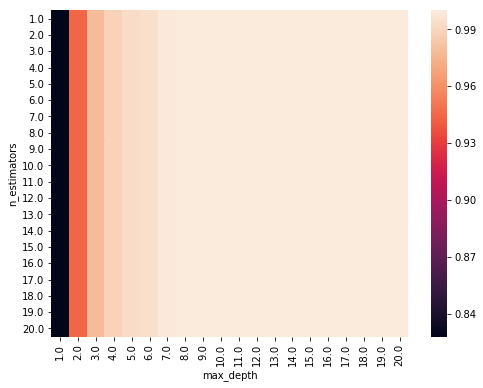

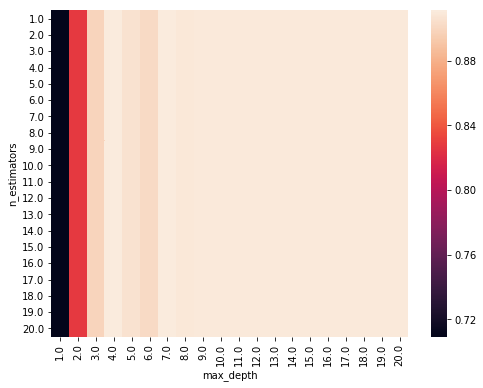

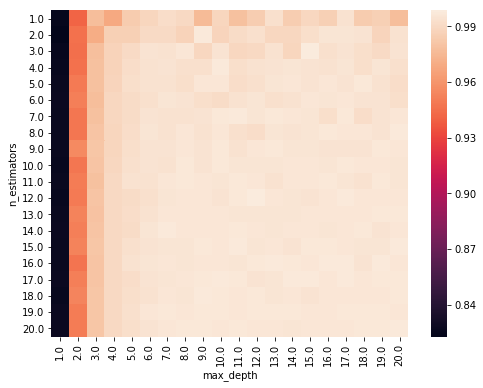

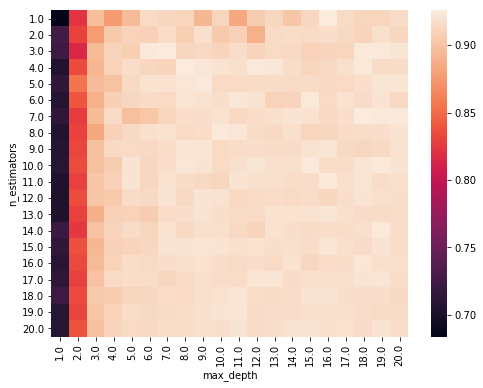

In [6]:
df_tree_train = pd.DataFrame(scores_list_tree_train, columns=["n_estimators","max_depth","score"])
df_tree_train_pivoted = df_tree_train.pivot("n_estimators","max_depth","score")
df_tree_test = pd.DataFrame(scores_list_tree_test, columns=["n_estimators","max_depth","score"])
df_tree_test_pivoted = df_tree_test.pivot("n_estimators","max_depth","score")
df_bagging_train = pd.DataFrame(scores_list_bagging_train, columns=["n_estimators","max_depth","score"])
df_bagging_train_pivoted = df_bagging_train.pivot("n_estimators","max_depth","score")
df_bagging_test = pd.DataFrame(scores_list_bagging_test, columns=["n_estimators","max_depth","score"])
df_bagging_test_pivoted = df_bagging_test.pivot("n_estimators","max_depth","score")


plt.figure(figsize = (8,6))
ax1 = sns.heatmap(df_tree_train_pivoted, fmt="d")

plt.figure(figsize = (8,6))
ax2 = sns.heatmap(df_tree_test_pivoted, fmt="d")

plt.figure(figsize = (8,6))
ax3 = sns.heatmap(df_bagging_train_pivoted, fmt="d")

plt.figure(figsize = (8,6))
ax4 = sns.heatmap(df_bagging_test_pivoted, fmt="d")


##### Grace à ces heatmaps, on voit à la fois l' effet de la profondeur et le rôle de L pour le regresseur bagging. Il est trouvé c'est plutôt la profondeur d'arbre qui détermine la précision de prédiction. Mais en point de vu de chaque effet, le plus L et le plus la profondeur, le meilleur score il nous donne.

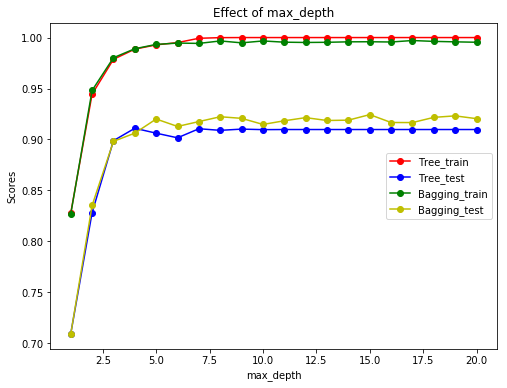

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_list, df_tree_train[df_tree_train['n_estimators']
                                       == 10]['score'], 'o', linestyle='-', c="r", label="Tree_train")
plt.plot(max_depth_list, df_tree_test[df_tree_test['n_estimators']
                                      == 10]['score'], 'o', linestyle='-', c="b", label="Tree_test")
plt.plot(max_depth_list, df_bagging_train[df_bagging_train['n_estimators']
                                          == 10]['score'], 'o', linestyle='-', c="g", label="Bagging_train")
plt.plot(max_depth_list, df_bagging_test[df_bagging_test['n_estimators']
                                         == 10]['score'], 'o', linestyle='-', c="y", label="Bagging_test")
plt.title("Effect of max_depth")
plt.xlabel('max_depth')
plt.ylabel('Scores')
plt.legend(loc=5, numpoints=1)
plt.show()

##### À la même profondeur, les scores de regression par tree decision et bagging sont proches pour l'enjeux d'apprentissage, par contre l'approche bagging montre légèrement meilleur score que tree decision pour l'enjeux de test.

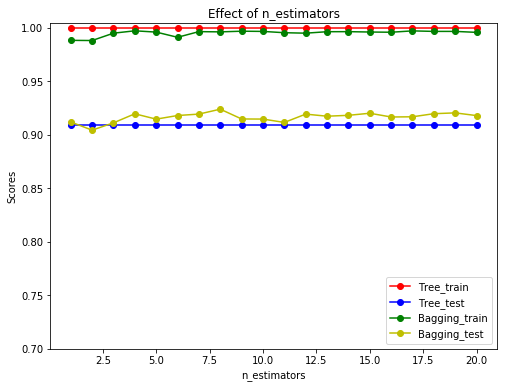

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, df_tree_train[df_tree_train['max_depth']==10]['score'], 'o', linestyle ='-', c="r", label = "Tree_train")
plt.plot(n_estimators_list, df_tree_test[df_tree_test['max_depth']==10]['score'], 'o', linestyle ='-', c="b", label = "Tree_test")
plt.plot(n_estimators_list, df_bagging_train[df_bagging_train['max_depth']==10]['score'], 'o', linestyle ='-', c="g", label = "Bagging_train")
plt.plot(n_estimators_list, df_bagging_test[df_bagging_test['max_depth']==10]['score'], 'o', linestyle ='-', c="y", label = "Bagging_test")
plt.title("Effect of n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.ylim(0.7)
plt.legend(loc=4, numpoints=1)
plt.show()

##### Au dessus quel que  L, bagging est légèrement plus performant que decision tree pour l'enjeux de test.

### Question 3: A quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance.

##### $Dn = (X1, Y1), . . . ,(Xn, Yn)$ un n-échantillon i.i.d. et de même loi que $(X, Y )$ et $m(x) = \mathbb{E}[Y |X = x]$ la fonction de régression. Pour $x ∈ \mathbb{R}_p$,  l’erreur quadratique moyenne d’un estimateur $\hat{m}$ et sa décomposition biais-variance :

##### $$\mathbb{E}[(\hat{m}(x) − m(x))^2] = (\mathbb{E}[\hat{m}(x)]-m(x))^2 + V(\hat{m}(x))$$


##### Bagging sont des méthodes d’agrégation. Elles consistent à agréger un nombre $B$ d’estimateurs $\hat{m}_1, . . . , \hat{m}_B : \hat{m}(x) = \frac{1}{B}\sum_{k=1}^{B} \hat{m}_k(x)$, si on suppose les régrésseurs $\hat{m}_1, . . . ,\hat{m}_B$ i.i.d., on a :

##### $$\mathbb{E}[\hat{m}(x)] = \mathbb{E}[\hat{m}_1(x)]$$  $$V(\hat{m}(x)) = \frac{1}{B}V(\hat{m}_1(x))$$ et $$B(\hat{m}(x)) = \mathbb{E}[\hat{m}_k(x)]-m(x)$$

##### Le biais de l’estimateur agrégé est donc le même que celui des $\hat{m}_k$ mais la variance diminue. 

### Question 4: En jouant sur le niveau de bruit mettez en évidence le sur-apprentissage.

In [9]:
noise_list = list(range(11))
scores_list_tree_train = []
scores_list_tree_test = []
scores_list_bagging_train = []
scores_list_bagging_test = []
for i in range(len(noise_list)):
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += i * (0.5 - rng.rand(16))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_train, y_train)
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=10)
    bagging.fit(X_train, y_train)
    # Predict
    y_tree_train = tree.predict(X_train)
    y_tree_test = tree.predict(X_test)
    y_bagging_train = bagging.predict(X_train)
    y_bagging_test = bagging.predict(X_test)
    score_tree_train = r2_score(y_train, y_tree_train)
    score_tree_test = r2_score(y_test, y_tree_test)
    score_bagging_train = r2_score(y_train, y_bagging_train)
    score_bagging_test = r2_score(y_test, y_bagging_test)
    scores_list_tree_train.append(score_tree_train)
    scores_list_tree_test.append(score_tree_test)
    scores_list_bagging_train.append(score_bagging_train)
    scores_list_bagging_test.append(score_bagging_test)
    

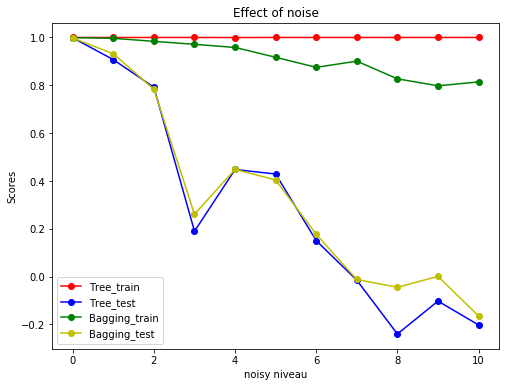

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(noise_list, scores_list_tree_train, 'o', linestyle ='-', c="r", label = "Tree_train")
plt.plot(noise_list, scores_list_tree_test, 'o', linestyle ='-', c="b", label = "Tree_test")
plt.plot(noise_list, scores_list_bagging_train, 'o', linestyle ='-', c="g", label = "Bagging_train")
plt.plot(noise_list, scores_list_bagging_test, 'o', linestyle ='-', c="y", label = "Bagging_test")
plt.title("Effect of noise")
plt.xlabel('noisy niveau')
plt.ylabel('Scores')
plt.legend(loc=3, numpoints=1)
plt.show()

##### Il est trouvé que plus les bruits est importants, le regression de l'enjeux d'apprentissage devient légèrement pire. En revanche, la prédiction avec les bruits importants diminue brusquement. En plus, le regression bagging est un peu plus capable  à contrer ce effet de sur-appprentissage si les bruits sont importants. 

### Question 5: Observer qu’on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap.


In [11]:
noise_list = list(range(11))
scores_list_tree_train = []
scores_list_tree_test = []
scores_list_bagging_train = []
scores_list_bagging_test = []
for i in range(len(noise_list)):
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += i * (0.5 - rng.rand(16))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_train, y_train)
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=10, max_samples=0.3, bootstrap=False)
    bagging.fit(X_train, y_train)
    # Predict
    y_tree_train = tree.predict(X_train)
    y_tree_test = tree.predict(X_test)
    y_bagging_train = bagging.predict(X_train)
    y_bagging_test = bagging.predict(X_test)
    score_tree_train = r2_score(y_train, y_tree_train)
    score_tree_test = r2_score(y_test, y_tree_test)
    score_bagging_train = r2_score(y_train, y_bagging_train)
    score_bagging_test = r2_score(y_test, y_bagging_test)
    scores_list_tree_train.append(score_tree_train)
    scores_list_tree_test.append(score_tree_test)
    scores_list_bagging_train.append(score_bagging_train)
    scores_list_bagging_test.append(score_bagging_test)
    

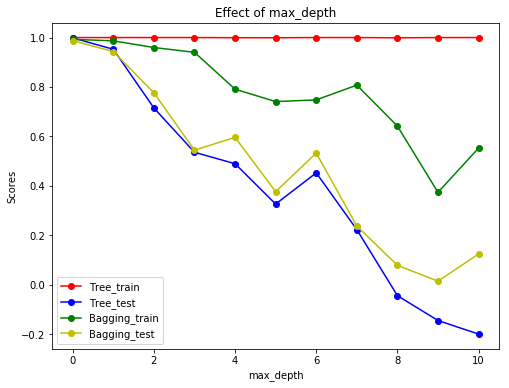

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(noise_list, scores_list_tree_train, 'o', linestyle ='-', c="r", label = "Tree_train")
plt.plot(noise_list, scores_list_tree_test, 'o', linestyle ='-', c="b", label = "Tree_test")
plt.plot(noise_list, scores_list_bagging_train, 'o', linestyle ='-', c="g", label = "Bagging_train")
plt.plot(noise_list, scores_list_bagging_test, 'o', linestyle ='-', c="y", label = "Bagging_test")
plt.title("Effect of max_depth")
plt.xlabel('max_depth')
plt.ylabel('Scores')
plt.legend(loc=3, numpoints=1)
plt.show()

##### Avec le tirage avce remise (bootstrap = false), on voit que le score de regression sur l'enjeux d'aprentissage est assez  beaucoup baissé par les bruits, par contre l'écart entre le score d'apprentissage et le score de test est fortement réduit. 

## Random Forests

### Question 6: Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez ces performances avec celles d’un SVM linéaire. 

In [13]:
# Load data
boston = load_boston()
diabetes = load_diabetes()
iris  = load_iris()
digits = load_digits()
X_boston, y_boston = boston.data, boston.target
X_diabetes, y_diabetes = diabetes.data, diabetes.target
X_iris, y_iris = iris.data,iris.target
X_digits, y_digits = digits.data, digits.target

In [14]:
regrSVR = LinearSVR()
regrSVC = LinearSVC()
rfLinear = RandomForestRegressor()
rfClass = RandomForestClassifier()
scores_rf = cross_val_score(rfLinear, X_boston, y_boston, cv=7)
print("For dataset boston, the score by random forest regressor is:", scores_rf.mean())
scores_svm = cross_val_score(regrSVR, X_boston, y_boston, cv=7)
print("For dataset boston, the score by SVR is:", scores_svm.mean())
scores_rf = cross_val_score(rfLinear, X_diabetes, y_diabetes, cv=7)
print("For dataset diabetes, the score by random forest regressor is:", scores_rf.mean())
scores_svm = cross_val_score(regrSVR, X_diabetes, y_diabetes, cv=7)
print("For dataset diabetes, the score by SVR is:", scores_svm.mean())
scores_rf = cross_val_score(rfClass, X_iris, y_iris, cv=7)
print("For dataset iris, the score by random forest classifier is:", scores_rf.mean())
scores_svm = cross_val_score(regrSVC, X_iris, y_iris, cv=7)
print("For dataset iris, the score by SVC is:", scores_svm.mean())
scores_rf = cross_val_score(rfClass, X_digits, y_digits, cv=7)
print("For dataset digits, the score by random forest classifier is:", scores_rf.mean())
scores_svm = cross_val_score(regrSVC, X_digits, y_digits, cv=7)
print("For dataset digits, the score by SVC is:", scores_svm.mean())

For dataset boston, the score by random forest regressor is: 0.60140288657
For dataset boston, the score by SVR is: -0.089809771812
For dataset diabetes, the score by random forest regressor is: 0.344189884115
For dataset diabetes, the score by SVR is: -0.373676207658
For dataset iris, the score by random forest classifier is: 0.932823129252
For dataset iris, the score by SVC is: 0.952380952381
For dataset digits, the score by random forest classifier is: 0.89087132264
For dataset digits, the score by SVC is: 0.913194550863


##### Par l'évaluation de cross validation, il est trouvé que pour les datasets continus: boston et diabetes, le random forest regressor donne meilleur score que SVR. En puis, pour les datasets en classe: iris et digits, random forest regressor et SVC montrent presque le même score.

### Question 7: En utilisant le dataset iris restreint aux deux premières variables explicatives afficher la probabilité de prédiction des classes. On partira du script suivant et on fera varier le nombre d’arbres aléatoires (variable n_estimators).

In [15]:
# Load data
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)

In [16]:
# Parameters
def plot_rf_esti(n_estimators):   
    plot_colors = "bry"
    plot_step = 0.02
    # RF fitting
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.figure()

    for tree in model.estimators_:
        # TODO use predict to obtain the probabilities you will store in Z
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.legend(scatterpoints=1)
    plt.show()

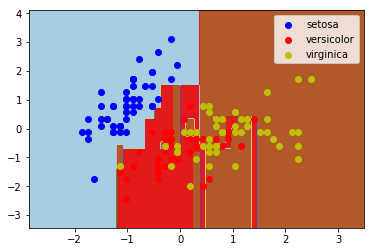

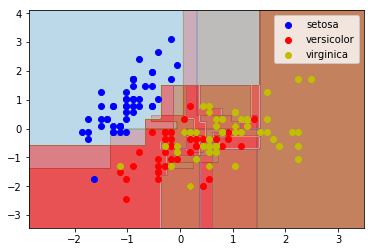

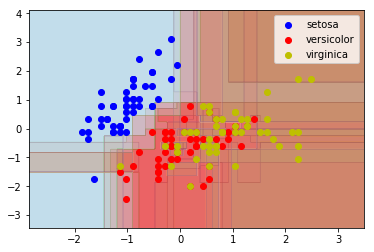

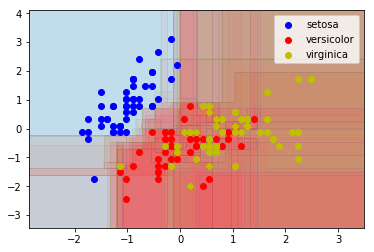

In [17]:
plot_rf_esti(1)
plot_rf_esti(2)
plot_rf_esti(5)
plot_rf_esti(10)

##### Pour le random forest regressor, n_estimators est le nombre des arbres dans le forêt, plus précis pour le classifieur. 

### Question 8: Comparez les scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures (obtenus avec DecisionTreeClassifier), sur le dataset iris restreint aux deux premières variables explicatives. On fera varier le paramètre max_depth entre 1 et 30. Mettre en évidence le fait que les Random Forests permettent de réduire le sur-apprentissage, et ce même pour des arbres profonds.

In [28]:
scores_rf = cross_val_score(rfClass, X_unscaled, y, cv=6)
print("the score by random forest classifier is:", scores_rf.mean())
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X_unscaled, y, cv=6)
print("the score by decision tree is:", scores_dt.mean())

the score by random forest classifier is: 0.679012345679
the score by decision tree is: 0.6875


In [29]:
max_depth_list = list(range(1,31))
scores_list_rf = []
scores_list_dt = []
for max_depth in max_depth_list:
    rfClass = RandomForestClassifier(max_depth = max_depth)
    dt = DecisionTreeClassifier(max_depth= max_depth)
    scores_rf = cross_val_score(rfClass, X_unscaled, y, cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=1))
    scores_list_rf.append(scores_rf.mean())    
    scores_dt = cross_val_score(dt, X_unscaled, y, cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=1))
    scores_list_dt.append(scores_dt.mean())

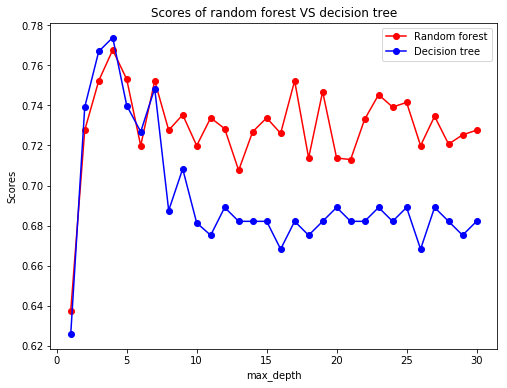

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_list, scores_list_rf, 'o', linestyle ='-', c="r", label = "Random forest")
plt.plot(max_depth_list, scores_list_dt, 'o', linestyle ='-', c="b", label = "Decision tree")
plt.title("Scores of random forest VS decision tree")
plt.xlabel('max_depth')
plt.ylabel('Scores')
plt.legend(loc=1, numpoints=1)
plt.show()

##### Tant que la profondeur d'arbre est petit, les cross validation scores par random forest et decision tree sont presque pareil. A1u-dessus de quel que profondeur ( ici c'est quand max_depth dépasse 6 ), les scores de random forest sont meilleurs que ceux de decision tree.

## Boosting

### Question 9: Démontrez la propriété suivante : Le minimiseur de la fonction $f$ $\rightarrow$ $\mathbb{E}(exp(-Yf(x))$ est atteint en $f^*_{exp} = \frac{1}{2} log(\frac{\mu(x)}{1-\mu(x)})$.

Sachant que: $$\mathbb{E}[e^{-Y f(x)} | x] = \sum_{y} e^{-yf(x)} \mathbb{P}(Y=y | x)$$
Et les étiquettes ont deux valeurs possibles : 1 et -1, et la fonction de régression $\eta(x)\triangleq \mathbb{P}(Y=1|X=x)$, donc:$$ R_{exp}(f)= \mathbb{P}(Y=1|x)e^{-f(x)} + \mathbb{P}(Y=-1|x)e^{f(x)}$$

Le minimum de $\mathbb{E}[e^{-Y f(x)}]$ est trouvé quand sa dérivée équale zéro, soit:

$$\frac{\partial(\mathbb{E}[e^{-Y f(x)}])}{\partial f(x)} = - \eta(x) e^{-f(x)} + (1-\eta(x)) e^{f(x)} = 0$$

$$ \Leftrightarrow \frac{e^{f(x)}}{e^{-f(x)}} = \frac{\eta(x)}{1-\eta(x)}$$

$$ \Leftrightarrow e^{2f(x)} = \frac{\eta(x)}{1-\eta(x)}$$
$$ \Leftrightarrow f^*_{exp}(x)= \frac{1}{2} log(\frac{\eta(x)}{1-\eta(x)})$$

### Question 10: En déduire que le classifieur de Bayes associé au risque Rexp est le même que le classifieur de Bayes associé au risque 0/1, $R_{\phi_0}$ .


Le classifieur de bayes associé au risque $R_{exp}$ :
$ h^{*}_{\exp} = sign[ \frac{1}{2 } log(\frac{\eta(x)}{1-\eta(x)})]$


$h^{*}_{\exp}$ = $ \begin{cases}
\quad + \quad ssi \quad \frac{\eta(x)}{1-\eta(x)} > 1
\\
\quad - \quad ssi \quad \frac{\eta(x)}{1-\eta(x)} < 1
\end{cases}$

$h^{*}_{\exp}$ = $ \begin{cases}
\quad + \quad ssi \quad 2\eta(x) - 1> 0
\\
\quad - \quad ssi \quad 2\eta(x) - 1< 0
\end{cases}$

Le classifieur de Bayes associé au risque 0/1 : $ h^{*}_{\rho_{0}} = sign(2\eta(x) -1)$

Si duex classifieurs nous envoient positive si $\eta(x) > \frac{1}{2}$ ou négative si $\eta(x) < \frac{1}{2}$

### Question 11: Montrer que la solution du dernier programme d’optimisation est $c_m = \frac{1}{2}log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X))}{\mathbb{P}_{\omega^{m-1}}(Y\neq\hat{h}_m(X))} \right]$.

En commencant par:
$$\mathbb{E}_{\omega^{m-1}}[exp(-c Y  \hat{h}_m(X))] = \frac{1}{n}  \mathrel{\sum^{n}_{i=1}}  [\omega_i^{m-1} exp(−c Y_i  \hat{h}_m (X_i))] \\= \sum_{Y_i = \hat{h}_m(X_i)} \omega_i^{m-1} exp(−c) +  \sum_{Y_i \neq \hat{h}_m(X_i)} \omega_i^{m-1} exp(c) \\ = exp(-c)\sum_{i=1}^n w_i^{m-1} \mathbb{I}_{\{Y_i = \hat{h}_m(X_i)\}} + exp(c)\sum_{i=1}^n w_i^{m-1} \mathbb{I}_{\{Y_i \neq \hat{h}_m(X_i)\}} $$ 
Puis on prend l'expression dans le sujet, on a donc:
$$\mathbb{E}_{\omega^{m-1}}[exp(-c Y  \hat{h}_m(X))] = exp(-c)\mathbb{P}_{\{Y_i = \hat{h}_m(X_i)\}} + exp(c)\mathbb{P}_{\{Y_i \neq \hat{h}_m(X_i)\}} $$ 
La function est minimisée quand sa dérivée de c est zéro, soit: 
$$\frac{\partial(exp(-c)\mathbb{P}_{\{Y_i = \hat{h}_m(X_i)\}} + exp(c)\mathbb{P}_{\{Y_i \neq \hat{h}_m(X_i)\}})}{\partial c} = 0 \\ \Leftrightarrow e^{2c} = \frac{\mathbb{P}_{Y_i = \hat{h}_m(X_i)}}{\mathbb{P}_{Y_i \neq \hat{h}_m(X_i)}} $$
Enfin: 
$$ c_m = \frac{1}{2} log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X)) }{\mathbb{P}_{\omega^{m-1}}(Y \neq \hat{h}_m(X))} \right] $$

En commencant par:
$$\mathbb{E}_{\omega^{m-1}}[exp(-c Y  \hat{h}_m(X))] = \frac{1}{n}  \mathrel{\sum^{n}_{i=1}}  [\omega_i^{m-1} exp(−c Y_i  \hat{h}_m (X_i))] \\= \sum_{Y_i = \hat{h}_m(X_i)} \omega_i^{m-1} exp(−c) +  \sum_{Y_i \neq \hat{h}_m(X_i)} \omega_i^{m-1} exp(c) \\ = exp(-c)\sum_{i=1}^n \omega_i^{m-1} \mathbb{1}_{\{Y_i = \hat{h}_m(X_i)\}} + exp(c)\sum_{i=1}^n \omega_i^{m-1} \mathbb{1}_{\{Y_i \neq \hat{h}_m(X_i)\}} $$ 
Puis on prend l'expression dans le sujet, on a donc:
$$\mathbb{E}_{\omega^{m-1}}[exp(-c Y  \hat{h}_m(X))] = exp(-c)\mathbb{P}_{\omega^{m-1}}(Y_i = \hat{h}_m(X_i)) + exp(c)\mathbb{P}_{\omega^{m-1}}(Y_i \neq \hat{h}_m(X_i))$$ 
La function est minimisée quand sa dérivée de c est zéro, soit: 
$$\frac{\partial(exp(-c)\mathbb{P}_{\omega^{m-1}}(Y_i = \hat{h}_m(X_i)) + exp(c)\mathbb{P}_{\omega^{m-1}}(Y_i \neq \hat{h}_m(X_i))}{\partial c} = 0 \\ \Leftrightarrow e^{2c} = \frac{\mathbb{P}_{\omega^{m-1}}{(Y_i = \hat{h}_m(X_i))}}{\mathbb{P}_{\omega^{m-1}}{(Y_i \neq \hat{h}_m(X_i))}} $$
Enfin: 
$$ c_m = \frac{1}{2} log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X)) }{\mathbb{P}_{\omega^{m-1}}(Y \neq \hat{h}_m(X))} \right] $$

### Question 12: Montrons que les poids $\omega_{i}^{m} \propto \omega_{i}^{m-1}.exp(-c_{m}^*.Y_{i}.\hat{h}_{m}(X_{i}))$ et les poids $w_{i}^{m} \propto w_{i}^{m-1}.exp(2c_{m}.\mathbb{1}_{Y_{i}\neq\hat{h}_{m}(X_{i})})$ sont identiques, avec la convention : $ \hat{F}_{0} = 0$ et $w^{0}=\omega^{0}=(\frac{1}{n},...,\frac{1}{n})$.

** Pour les poids $\omega_{i}^{m} \propto \omega_{i}^{m-1}.exp(-c_{m}^*.Y_{i}.\hat{h}_{m}(X_{i}))$ :**

$ \begin{cases}
\quad Y_i = \hat{h}_m(Xi) \quad \Rightarrow \quad \omega_{i}^{m} \propto \omega_{i}^{m-1}.exp(-c_{m}^*) 
\\
\quad Y_i \neq \hat{h}_m(Xi) \quad \Rightarrow \quad \omega_{i}^{m} \propto \omega_{i}^{m-1}.exp(c_{m}^*) 
\end{cases}$

Si on fois $exp(c_m^*)$ à l'espression au-dessus:

$ \begin{cases}
\quad Y_i = \hat{h}_m(Xi) \quad \Rightarrow \quad \omega_{i}^{m} \propto \omega_{i}^{m-1}
\\
\quad Y_i \neq \hat{h}_m(Xi) \quad \Rightarrow \quad \omega_{i}^{m} \propto \omega_{i}^{m-1}.exp(2c_{m}^*)
\end{cases}$

** Pour les poids $w_{i}^{m} \propto w_{i}^{m-1}.exp(2c_{m}.\mathbb{1}_{Y_{i}\neq\hat{h}_{m}(X_{i})})$ **

$ \begin{cases}
\quad Y_i = \hat{h}_m(Xi) \quad \Rightarrow \quad w_{i}^{m} \propto w_{i}^{m-1}
\\
\quad Y_i \neq \hat{h}_m(Xi) \quad \Rightarrow \quad w_{i}^{m} \propto w_{i}^{m-1}.exp(2c_{m})
\end{cases}$

Puis si $\omega_0 = w_0 \Rightarrow c_m^* = c_m$, donc ceux deux expressions des poids sont identiques.

### Question 13: Mettre en œuvre AdaBoost avec des arbres de profondeur 1, puis 2, puis 10, sur le jeu de données digits. On calculera notamment la précision obtenue par 6-fold cross-validation. 

In [31]:
max_depth_list = list(range(1,31))
scores_list_ab = []
for max_depth in max_depth_list:  
    tree = DecisionTreeClassifier(max_depth= max_depth)
    abClass = AdaBoostClassifier(base_estimator= tree)
    scores_ab = cross_val_score(abClass, X_digits, y_digits, cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=1))
    scores_list_ab.append(scores_ab.mean())
    #print("For the tree depth:", max_depth, ", the cross validation score is:", scores_ab.mean())

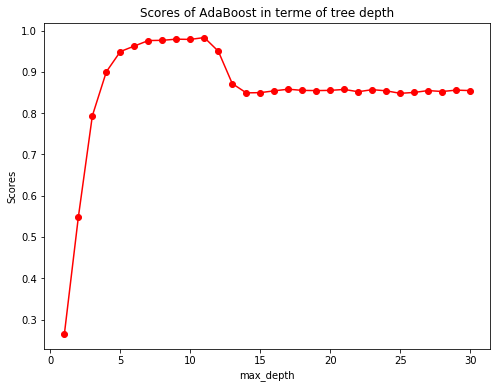

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_list, scores_list_ab, 'o', linestyle ='-', c="r")
plt.title("Scores of AdaBoost in terme of tree depth")
plt.xlabel('max_depth')
plt.ylabel('Scores')
plt.legend(loc=1, numpoints=1)
plt.show()

### Question 14:  Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%) et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations.

In [33]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.25, random_state=42)

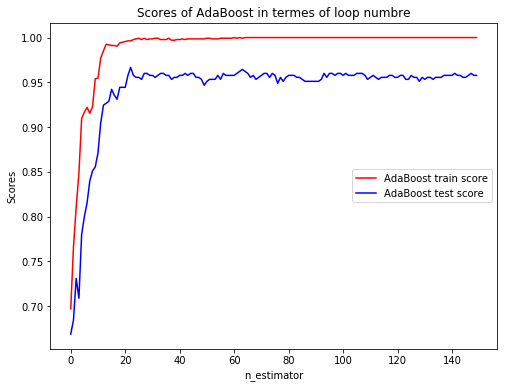

In [34]:
n_estimators = 150
tree = DecisionTreeClassifier(max_depth=5)
abClass = AdaBoostClassifier(base_estimator= tree, n_estimators= n_estimators)
abClass.fit(X_digits_train,y_digits_train)
staged_scores_train = [s for s in abClass.staged_score(X_digits_train,y_digits_train)]
staged_scores_test = [s for s in abClass.staged_score(X_digits_test,y_digits_test)]

plt.figure(figsize=(8, 6))
plt.plot(range(n_estimators), staged_scores_train, linestyle ='-', c="r", label = "AdaBoost train score")
plt.plot(range(n_estimators), staged_scores_test, linestyle ='-', c="b", label = "AdaBoost test score")
plt.title("Scores of AdaBoost in termes of loop numbre")
plt.xlabel('n_estimator')
plt.ylabel('Scores')
plt.legend(loc=5, numpoints=1)
plt.show()

##### Pour l'enjeux d'pprentissage et l'enjeux de test, Les évaluations de tendance sont pareil, plus le nombre de itération, meilleur le score. Puis la courbe de score devient plat si l'itération dépasse quel que nombres. 

### Question 15: Que remarquez vous ? Que se passe-t-il si la profondeur des arbres de classification est grande ?

##### En ragardant la question 12, il est remarqué tant que la prodondeur d'arbre est petite, le score augmente avec la profondeur, plus il devient la courbe devient plate. Si la profondeur est trop élevée(ici c'est max_depth > 12), le score baise un petit à cause de sur-apprentissage.